# Sleep Disorder Prediction

The goal is to predict whether a person has a sleep disorder based on features like sleep habits, lifestyle, and health indicators.

# Data Collection and Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset from Kaggle or Google Drive
data = pd.read_csv('/content/sleepdataset.csv')

# Display first few rows of the dataset
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['Person ID'])

In [ ]:
# Encode categorical variables like Gender, Occupation, BMI Category
label_encoders = {}

categorical_cols = ['Gender', 'Occupation', 'BMI Category']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Check for missing values and handle them if necessary
print(data.isnull().sum())

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [ ]:
# Fill NA values in 'Sleep Disorder' column with 'Normal'
data['Sleep Disorder'].fillna('Normal', inplace=True)

<ipython-input-18-4f0a9391d5dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].fillna('Normal', inplace=True)


In [ ]:
# Drop the 'Blood Pressure' column
data = data.drop(columns=['Blood Pressure'])

In [ ]:
# Normalize numerical columns using StandardScaler
scaler = StandardScaler()

# Split 'Blood Pressure' into systolic and diastolic, then convert to numeric
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)


numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Daily Steps']


data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Print preprocessed data
print(data.head())

   Gender       Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1 -1.753096           9       -1.298887         -1.098280   
1       1 -1.637643           1       -1.173036         -1.098280   
2       1 -1.637643           1       -1.173036         -1.098280   
3       1 -1.637643           6       -1.550588         -2.771424   
4       1 -1.637643           6       -1.550588         -2.771424   

   Physical Activity Level  Stress Level  BMI Category Blood Pressure  \
0                -0.825418      0.347021             3         126/83   
1                 0.039844      1.475592             0         125/80   
2                 0.039844      1.475592             0         125/80   
3                -1.402260      1.475592             2         140/90   
4                -1.402260      1.475592             2         140/90   

   Heart Rate  Daily Steps Sleep Disorder  Systolic BP  Diastolic BP  
0    1.654719    -1.619584         Normal    -0.330002     -0.268102  
1   

# Exploratory Data Analysis

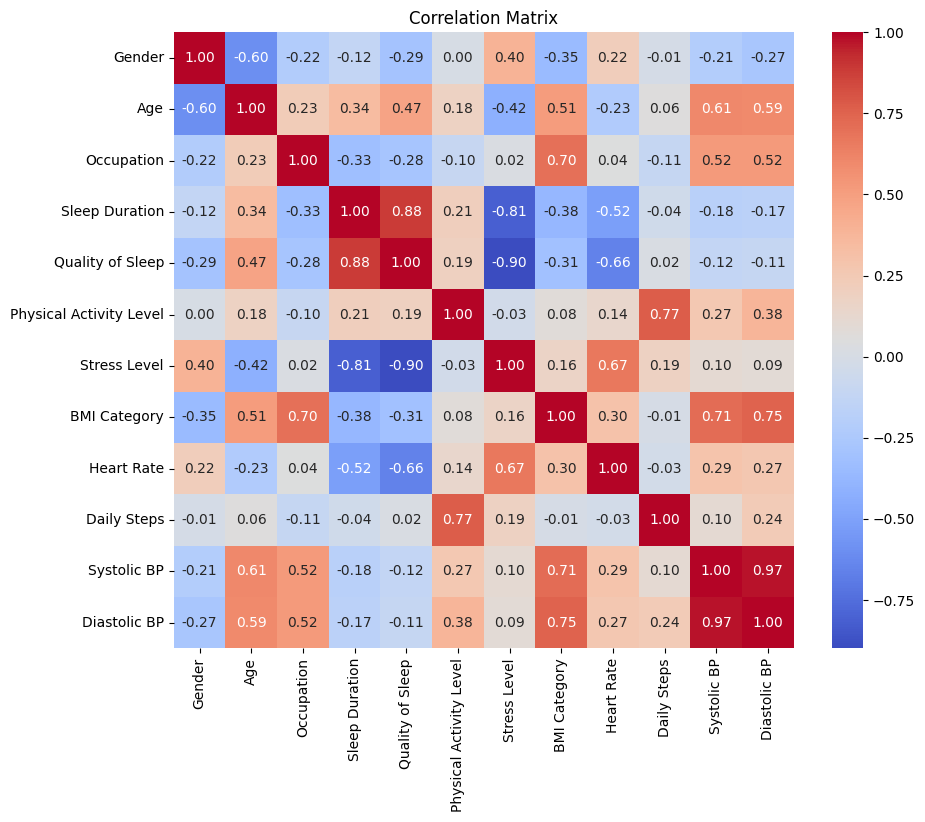

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the correlation between features, excluding non-numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

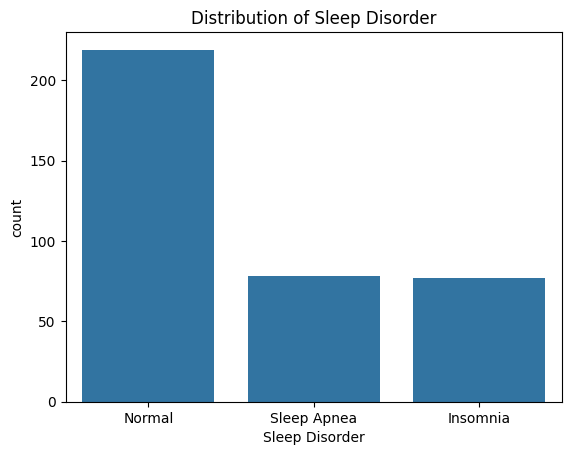

In [ ]:
# Visualize the distribution of the target variable (Sleep Disorder)
sns.countplot(x='Sleep Disorder', data=data)
plt.title('Distribution of Sleep Disorder')
plt.show()

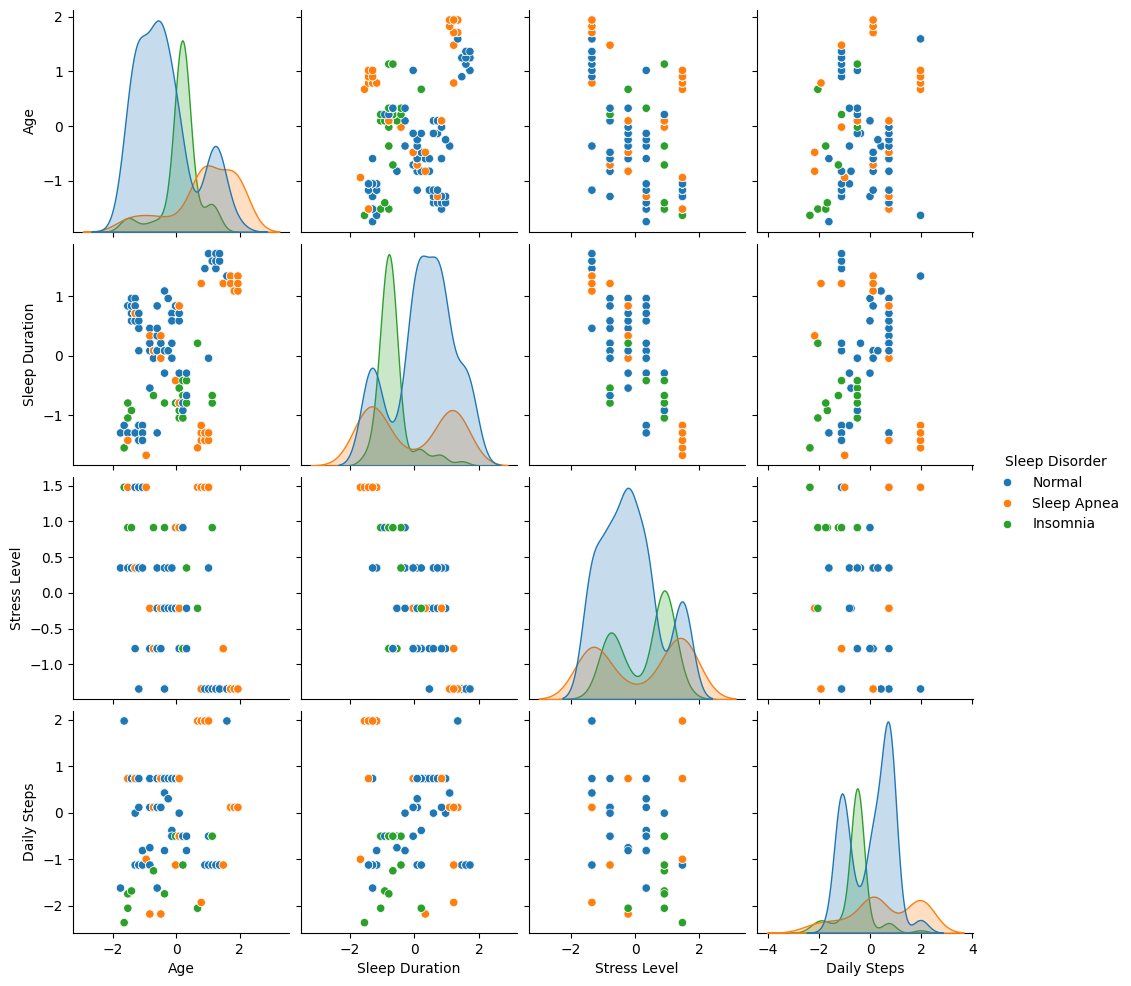

In [ ]:
# Pairplot for key features against Sleep Disorder
sns.pairplot(data, hue='Sleep Disorder', vars=['Age', 'Sleep Duration', 'Stress Level', 'Daily Steps'])
plt.show()

In [ ]:
# Select features for the model
X = data[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
          'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI Category']]
# Target variable (Sleep Disorder)
y = data['Sleep Disorder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (299, 10)
Test set size: (75, 10)


# Model Building and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Accuracy: 0.88
Precision: 0.8787611865258924
Recall: 0.88
F1 Score: 0.8771926158133055


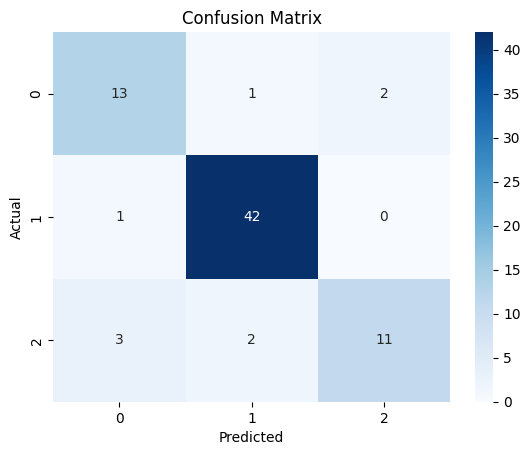

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
# Changed 'average' to 'weighted' for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Accuracy: 0.88
SVM Precision: 0.8922881562881564
SVM Recall: 0.88
SVM F1 Score: 0.8820854932011118


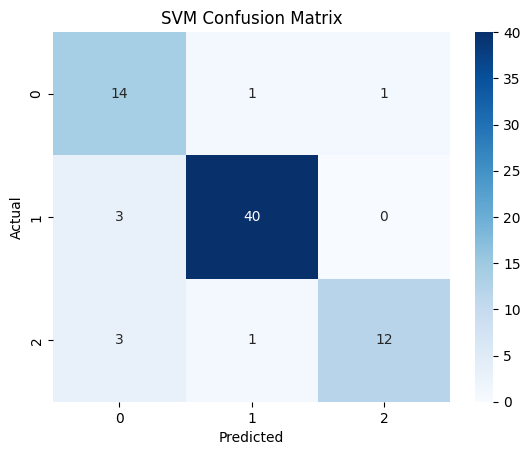

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels (e.g., 'rbf', 'poly')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle

# Assuming your trained model is named 'model'
# Replace 'model' with your actual model variable

# Save the model to a pickle file
filename = 'sleep_disorder_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

# Load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))